In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.drop('customerID',axis = 'columns', inplace = True)

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [13]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [17]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [22]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

AttributeError: 'tuple' object has no attribute 'drop'

In [21]:
df.shape

(7043, 20)

In [23]:
df.iloc[488]['TotalCharges']

' '

In [24]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [25]:
df1[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

C:\Users\anupa\AppData\Local\Temp\ipykernel_448\1199161278.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape


(0, 20)

In [27]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\anupa\AppData\Local\Temp\ipykernel_448\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [28]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [29]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [35]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [31]:
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

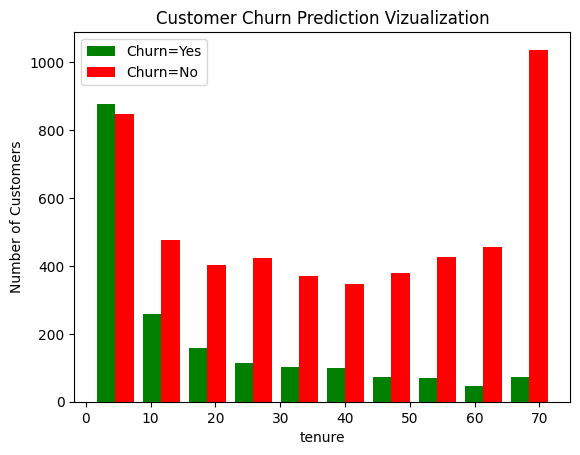

In [37]:
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label = ['Churn=Yes','Churn=No'])

plt.xlabel("tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Vizualization")

plt.legend()

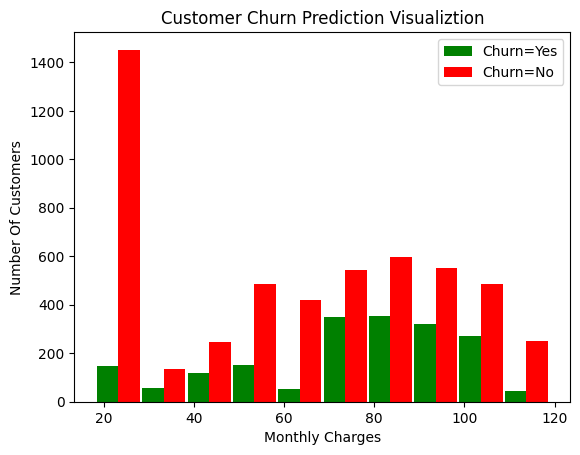

In [38]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# MyJupyter


## Hey ! I am Anupam learning Data Science.

### Data Science Languages
1. Python
2. R
3. SQL
4. TensorFlow
5. Java

### Data Science Libraries
1. Pandas
2. Matplotlib
3. Scipy
4. TensorFlow
5. Seaborn

## Data Science Tools

| Tool       | Description                                     |
|------------|-------------------------------------------------|
| Jupyter    | An open-source web application for creating and sharing documents with live code. |
| Pandas     | A library for data manipulation and analysis in Python. |
| NumPy      | A library for numerical computations in Python. |
| Scikit-learn | A library for machine learning in Python.    |
| Matplotlib | A plotting library for creating static, animated, and interactive visualizations in Python. |
| TensorFlow | An open-source platform for machine learning.  |
| Keras      | A high-level neural networks API, written in Python and capable of running on top of TensorFlow. |
| SQL        | A language used for managing and querying relational databases. |
| GitHub     | A platform for version control and collaboration. |
| Tableau    | A data visualization tool used for converting raw data into interactive and shareable dashboards. |


## Arithmetic Expression Examples

In this section, we will explore basic arithmetic expressions and operations. Arithmetic expressions are fundamental to programming and data analysis. Below are some common operations and examples:

- **Addition:** Adding two numbers together.
- **Subtraction:** Subtracting one number from another.
- **Multiplication:** Multiplying two numbers.
- **Division:** Dividing one number by another.
- **Exponentiation:** Raising a number to the power of another number.

We will demonstrate these operations with a few examples.


In [4]:
a = 2
b = 3
c = a * b
d = a + b
print(c, d)

6 5


In [3]:
# Function to convert minutes to hours
def convert_minutes_to_hours(minutes):
    hours = minutes / 60
    return hours

# Example usage
minutes = 120  # You can change this value to test other inputs
hours = convert_minutes_to_hours(minutes)
hours


2.0

## Objectives

1. Understand the basics of Markdown and its syntax for formatting.
2. Learn how to use code cells in Jupyter notebooks to perform calculations.
3. Practice creating and formatting markdown cells to present information clearly.
4. Explore various Data Science tools and libraries.
5. Develop skills to share Jupyter notebooks effectively through platforms like GitHub.
6. Gain proficiency in using arithmetic expressions and data conversion functions.


## Author

**Your Name Here**
